# Start Interactive Session

In [1]:
%pylab inline
import tensorflow as tf
import pandas as pd
import numpy as np

from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


## Create Data

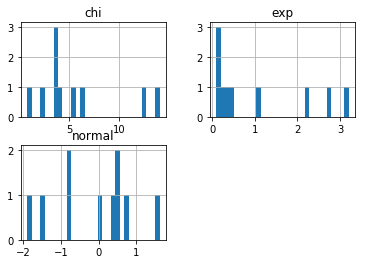

In [2]:
c1 = np.random.normal(size=10)
c2 = np.random.exponential(size=10)
c3 = np.random.chisquare(5, size=10)
c4 = np.array([None]*10)

data = pd.DataFrame({'normal': c1, 'exp':c2, 'chi':c3, 'none': c4}, columns=['normal', 'exp', 'chi', 'none'])
data.to_csv('random.data', header=False)


data.hist(bins=30)
clear_output()

In [3]:
init_op = tf.global_variables_initializer()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.01, allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(init_op)

## Reading CSV Files

[tf.train.string_input_producer](https://www.tensorflow.org/api_docs/python/tf/train/string_input_producer)를 사용하면 file names을 갖고 있는 FIFO queue를 만들수 있습니다. 이는 말그대로 file names을 갖고 있는 것이지 파일 안의 데이터를 갖고 있지는 않습니다. 이때 옵션에 따라서 shuffling 또는 maximum number of epochs를 설정할수도 있습니다.

흥미로운 점은 forloop을 돌면서 가령 Data의 갯수 (rows)는 10개라고 했을때 그 이상 forloop을 돌면은 계속 반복해서 파일의 처음부터 다시 읽듯이 read를 합니다. string_input_producer에서 shuffle을 True값을 주는 것은 파일을 불러올때의 shuffle이지 데이터를 읽을때의 shuffle은 아닙니다.

문제가 될 수 있는 부분은 header에 column names가 들어가게 되는데.. 이경우 skip_header 같은 옵션이 없기 때문에 파일을 읽을시 반드시 header가 삭제된 파일을 읽어야 합니다.

In [4]:
_files = ['random.data']
data_queue = tf.train.string_input_producer(_files, num_epochs=None, shuffle=True, name='file_input_producer')

reader = tf.TextLineReader()
key, value = reader.read(data_queue)

record_defaults = [[0.], [0.], [0.], [0.], [0.]]
col1, col2, col3, col4, col5 = tf.decode_csv(value, record_defaults=record_defaults)
features = tf.stack([col1, col2, col5])

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, daemon=True, start=True)

In [6]:
for i in range(100):
    example, idx, normal, exp, chi = sess.run([features, col1, col2, col3, col4])
    print('[%-2d] %5.2f  %5.2f  %5.2f\t | stack: %s'  % (idx, normal, exp, chi, example))

coord.request_stop()
coord.join(threads)
# data_queue.close()
# tf.Session.reset(sess, containers=['dataqueue'])

[0 ]  0.45   0.49   3.83	 | stack: [ 0.          0.45395735  0.        ]
[1 ]  0.34   0.36   3.64	 | stack: [ 1.          0.33982021  0.        ]
[2 ] -1.44   0.19   5.26	 | stack: [ 2.         -1.44052148  0.        ]
[3 ]  0.09   0.10   6.36	 | stack: [ 3.          0.08712945  0.        ]
[4 ] -0.77   2.27  14.12	 | stack: [ 4.         -0.77030915  0.        ]
[5 ]  1.61   3.20   3.86	 | stack: [ 5.          1.61097288  0.        ]
[6 ] -0.75   0.28   2.14	 | stack: [ 6.         -0.75481528  0.        ]
[7 ]  0.75   1.08   0.73	 | stack: [ 7.          0.74873269  0.        ]
[8 ]  0.51   2.75   3.79	 | stack: [ 8.          0.51361752  0.        ]
[9 ] -1.89   0.17  12.56	 | stack: [ 9.         -1.89026117  0.        ]
[0 ]  0.45   0.49   3.83	 | stack: [ 0.          0.45395735  0.        ]
[1 ]  0.34   0.36   3.64	 | stack: [ 1.          0.33982021  0.        ]
[2 ] -1.44   0.19   5.26	 | stack: [ 2.         -1.44052148  0.        ]
[3 ]  0.09   0.10   6.36	 | stack: [ 3.          0.